# Employee Attrition Analysis

## Objective
The goal of this analysis is to understand the key factors that contribute to employee attrition and to build a predictive model that can identify employees who are at higher risk of leaving. The insights from this analysis is aiming to support HR team in improving employee retention strategies.

## Power BI Dashboard – Attrition Analysis

![Power BI Attrition Dashboard](https://raw.githubusercontent.com/USERNAME/REPO/main/images/powerbi_attrition_dashboard.png)

🔗 [View Interactive Dashboard](https://app.powerbi.com/groups/me/reports/26d0c0e1-b25a-4ece-99a2-83b2f24bc1de/424c8823459eb66f4017?experience=power-bi)

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Data Overview
The dataset contains employee-level information related to compensation, work experience, and job tenure. Key features used in the analysis include age, monthly income, total working years, years in the current role, overtime status, and gender. The target variable was Attrition which indicates whether an employee left the organization.

In [46]:
df = pd.read_csv("Employee_attrition.csv")
num_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Education', 'StockOptionLevel']
df['Attrition_encoded'] = df['Attrition'].map({'Yes':1, 'No':0})
df['OverTime_encoded'] = df['OverTime'].map({'Yes':1, 'No':0})
df['Gender_encoded'] = df['Gender'].map({'Male':1, 'Female':0})

## Exploratory Data Analysis
Exploratory analysis was performed to identify patterns and relationships between employee attributes and attrition. Correlation analysis showed that tenure-related variables, such as years in the current role and total working years, have stronger relationships with attrition compared to other features. The Power BI dashboard further highlights that attrition is higher among employees with fewer working years, those early in their roles, and employees working overtime.

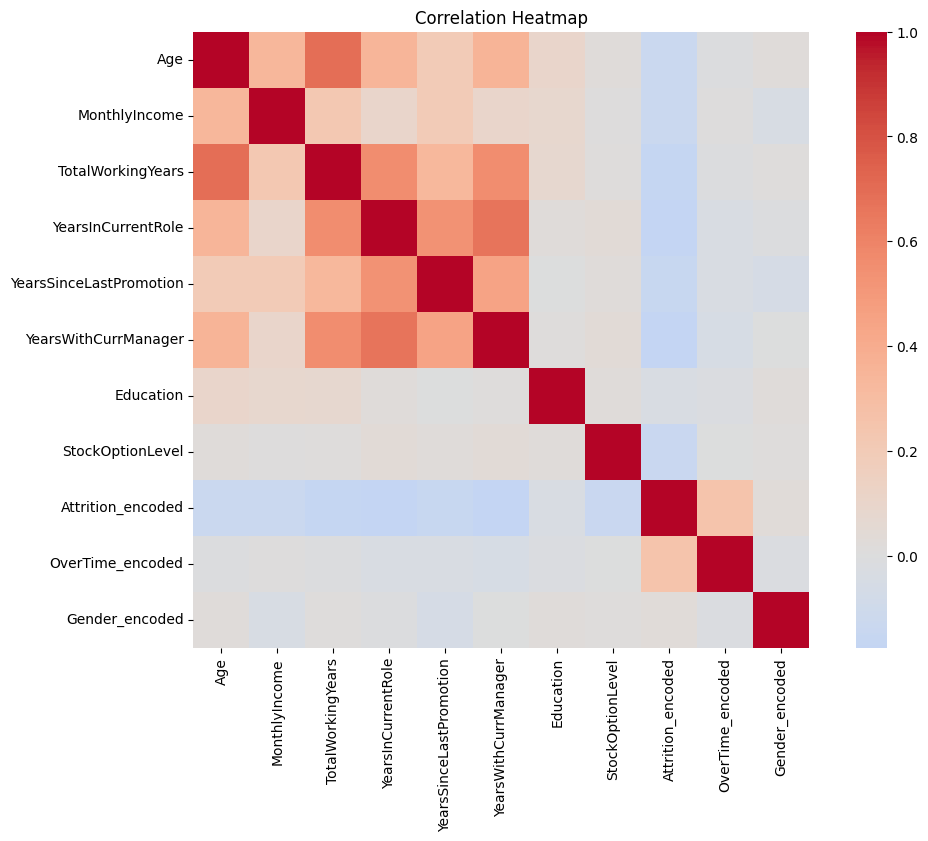

In [47]:
#  Correlation between variables
df_encoded = df[num_cols + ['Attrition_encoded', 'OverTime_encoded', 'Gender_encoded']]
df_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_matrix,
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation Heatmap")
plt.show()

## Filtering variable pairs with high correlation

In [48]:
df_encoded_filtered=df_encoded.corr()
corr_pairs=df_encoded_filtered.unstack()
corr_pairs = corr_pairs [corr_pairs != 1]
high_corr = corr_pairs[corr_pairs.abs() > 0.4]
print(high_corr)

Age                      TotalWorkingYears          0.689323
TotalWorkingYears        Age                        0.689323
                         YearsInCurrentRole         0.557862
                         YearsWithCurrManager       0.555865
YearsInCurrentRole       TotalWorkingYears          0.557862
                         YearsSinceLastPromotion    0.538448
                         YearsWithCurrManager       0.667583
YearsSinceLastPromotion  YearsInCurrentRole         0.538448
                         YearsWithCurrManager       0.449669
YearsWithCurrManager     TotalWorkingYears          0.555865
                         YearsInCurrentRole         0.667583
                         YearsSinceLastPromotion    0.449669
dtype: float64


In [49]:
high_corr_df = high_corr.reset_index()
high_corr_df.columns = ['Var1', 'Var2', 'Corr']

features = pd.unique(high_corr_df[['Var1', 'Var2']].values.ravel())

In [50]:
final_df_encoded = corr_df[features].assign(
    Attrition=corr_df['Attrition_encoded'],
    Employee_Count=1
)

# Saved relevant features for modeling
final_df_encoded.to_csv("final_model_dataset.csv", index=False)

# Build dataset for dashboard in Power BI
dashboard_dataset=df[num_cols + ['Attrition_encoded', 'OverTime_encoded', 'Gender_encoded']]

## Model Training
A logistic regression model was used to predict employee attrition. This model was selected because it is easy to interpret and suitable for binary classification problems. Categorical variables such as gender and overtime were encoded, and the data was split into training and testing sets to evaluate model performance on unseen data.

In [52]:
features = [
    'Age',
    'TotalWorkingYears',
    'YearsInCurrentRole',
    'OverTime_encoded',
]
target = 'Attrition'
df = df[features + [target]]

In [53]:


X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [54]:

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.92      0.72      0.81       576
         Yes       0.36      0.72      0.48       123

    accuracy                           0.72       699
   macro avg       0.64      0.72      0.64       699
weighted avg       0.82      0.72      0.75       699



## Results & Interpretation
The model achieved moderate overall accuracy, but more importantly, it successfully identified a majority of employees who eventually left. Tenure-related features showed the strongest influence on attrition risk, with negative coefficients indicating that employees who stay longer in their roles are less likely to leave. This confirms that early-stage employees face a higher risk of attrition.


In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


importance = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_[0]
}).sort_values(by='Impact', ascending=False)

print(importance)


Accuracy: 0.7224606580829757
              precision    recall  f1-score   support

          No       0.92      0.72      0.81       576
         Yes       0.36      0.72      0.48       123

    accuracy                           0.72       699
   macro avg       0.64      0.72      0.64       699
weighted avg       0.82      0.72      0.75       699

              Feature    Impact
3    OverTime_encoded  1.274926
0                 Age -0.012803
1   TotalWorkingYears -0.017019
2  YearsInCurrentRole -0.145946



## Conclusion
The analysis shows that employee attrition is strongly influenced by job tenure and early role experience. Employees who are new to their roles or have fewer working years are more likely to leave, highlighting the importance of effective onboarding and early engagement. By combining Power BI visual analytics with machine learning, this project demonstrates how HR data can be transformed into actionable insights to support employee retention and workforce planning.